<a href="https://colab.research.google.com/github/ram-7162/AimlPS/blob/main/solutionFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# ***Problem 1***



In this problem, we simulate how a stock price might move in the future.
Since future prices are uncertain, we generate many possible paths using randomness.

We use **Geometric Brownian Motion (GBM)**, which:
- Grows prices smoothly over time
- Adds randomness using normal distribution
- Is commonly used in finance

We will:
1. Simulate 1000 stock price paths
2. Plot all paths together
3. Plot histogram of final prices
4. Compare theoretical vs simulated results
5. Estimate European call option price


Model Parameters

1 S0: initial stock price
2 μ (mu): drift (average yearly growth)
3 σ (sigma): volatility (risk)
4 T: total time (1 year)
5 dt: daily time step (1/252)
6 Number of simulations: 1000


In [2]:
S0 = 100
mu = 0.08
sigma = 0.20
T = 1
dt = 1/252
N = 252
num_simulations = 1000


 **Simulating Stock Price Paths**

We use the GBM formula:

St+1 = St × exp[(μ − 0.5σ²)dt + σ√dt × Z]

Where Z is a random number from normal distribution.
We simulate prices day by day for 1 year.


In [3]:
np.random.seed(42)

price_paths = np.zeros((N + 1, num_simulations))
price_paths[0] = S0

for t in range(1, N + 1):
    Z = np.random.normal(0, 1, num_simulations)
    price_paths[t] = price_paths[t - 1] * np.exp(
        (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z
    )


#  Plotting Stock Price Paths

Each line represents one possible future price path.
Together, they form a “fan” of outcomes.


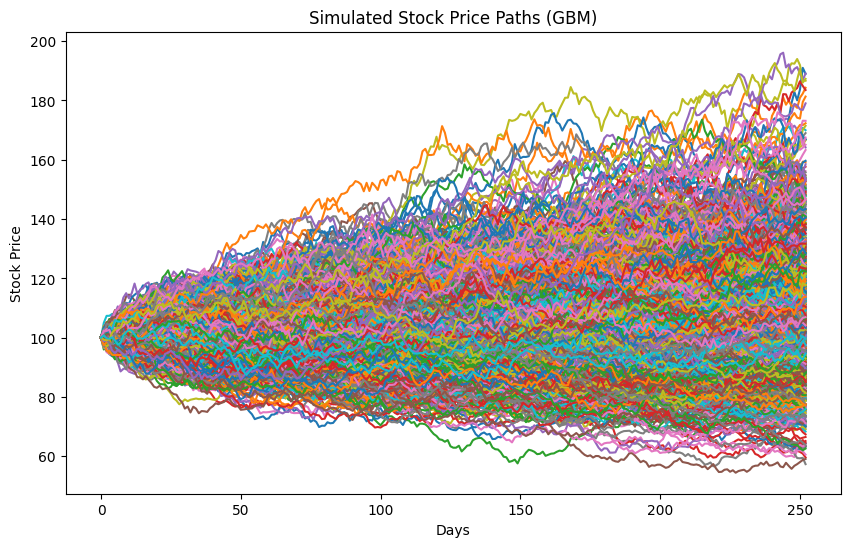

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(price_paths)
plt.title("Simulated Stock Price Paths (GBM)")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.show()


Histogram of Final Stock Prices

This shows how prices are distributed after 1 year.


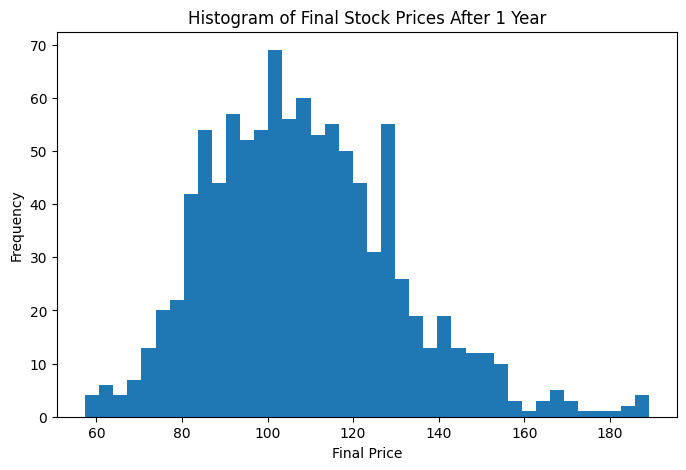

In [5]:
final_prices = price_paths[-1]

plt.figure(figsize=(8, 5))
plt.hist(final_prices, bins=40)
plt.title("Histogram of Final Stock Prices After 1 Year")
plt.xlabel("Final Price")
plt.ylabel("Frequency")
plt.show()


Comparing Theoretical and Simulated Results

GBM has known formulas for:
- Expected mean price
- Standard deviation

We compare theory with simulation results.


In [6]:
theoretical_mean = S0 * np.exp(mu * T)
theoretical_std = S0 * np.exp(mu * T) * np.sqrt(np.exp(sigma**2 * T) - 1)

simulated_mean = np.mean(final_prices)
simulated_std = np.std(final_prices)

summary_df = pd.DataFrame({
    "Metric": ["Mean Final Price", "Std Final Price"],
    "Theoretical": [theoretical_mean, theoretical_std],
    "Simulated": [simulated_mean, simulated_std]
})

summary_df


,Metric,Theoretical,Simulated
0,Mean Final Price,108.328707,108.400161
1,Std Final Price,21.884215,22.099994


# Estimating European Call Option Price

A call option payoff is:
max(ST − K, 0)

We calculate payoff for each path and take the average:

In [7]:
strike_price = 105
call_payoffs = np.maximum(final_prices - strike_price, 0)
call_option_price = np.mean(call_payoffs)

call_option_price


np.float64(10.428703737947192)

# ***PROBLEM 2***

### Problem 2: NPV and IRR Calculator

This problem focuses on time value of money.

We will:
1. Create a function to calculate NPV
2. Find IRR using bisection method
3. Plot NPV vs discount rate
4. Test using real examples


Net Present Value (NPV)

NPV tells us today’s value of future cash flows.
Positive NPV means the project is profitable.


In [8]:
def npv(rate, cashflows):
    total = 0
    for t in range(len(cashflows)):
        total += cashflows[t] / ((1 + rate) ** t)
    return total


Internal Rate of Return (IRR)

IRR is the discount rate where NPV becomes zero.
We use the bisection method because it is simple and stable.


In [9]:
def irr_bisection(cashflows, low=-0.99, high=10, tol=1e-6):
    for _ in range(1000):
        mid = (low + high) / 2
        value = npv(mid, cashflows)

        if abs(value) < tol:
            return mid

        if npv(low, cashflows) * value < 0:
            high = mid
        else:
            low = mid

    return None


Testing with Sample Cash Flows


In [10]:
cashflows_1 = [-10000, 3000, 4000, 5000]
irr_1 = irr_bisection(cashflows_1)

cashflows_2 = [-50000, 15000, 15000, 15000, 15000]
irr_2 = irr_bisection(cashflows_2)

irr_1, irr_2


(0.08896339469276417, 0.07713847295946827)


# NPV Profile Plot

This plot shows how NPV changes with discount rate.
IRR is where the curve crosses zero.

---



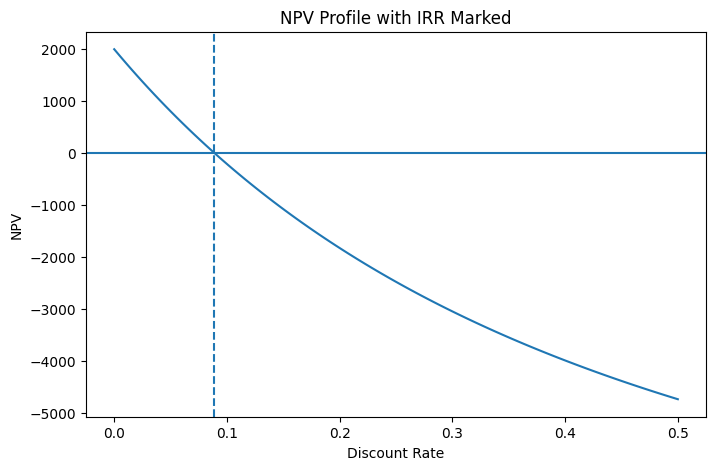

In [11]:
rates = np.linspace(0, 0.5, 100)
npv_values = [npv(r, cashflows_1) for r in rates]

plt.figure(figsize=(8, 5))
plt.plot(rates, npv_values)
plt.axhline(0)
plt.axvline(irr_1, linestyle='--')
plt.xlabel("Discount Rate")
plt.ylabel("NPV")
plt.title("NPV Profile with IRR Marked")
plt.show()


# NPV at Different Discount Rates


In [12]:
discount_rates = [0, 0.05, 0.10, 0.15, 0.20]

npv_table = pd.DataFrame({
    "Discount Rate": discount_rates,
    "NPV": [npv(r, cashflows_1) for r in discount_rates]
})

npv_table


,Discount Rate,NPV
0,0.00,2000.000000
1,0.05,804.448764
2,0.10,-210.368144
3,0.15,-1079.148516
4,0.20,-1828.703704
